# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для фиксации рандома, то есть воспроизводимости полученных результатов при повторном прогоне ячеек ноутбука")

Для фиксации рандома, то есть воспроизводимости полученных результатов при повторном прогоне ячеек ноутбука


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# Без фиксация рандома в отдельных ячейках воспроизводить результаты не получается
np.random.seed(42)

df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [10]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски есть как на train, так и на test выборках в фичах mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
df_train.drop('selling_price', axis=1).duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
df_train[df_train.drop('selling_price', axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [13]:
subset = df_train.drop('selling_price', axis=1).columns

df_train = df_train.drop_duplicates(subset=subset, keep='first')

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [16]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

df_train['engine'] = df_train['engine'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan )
df_test['engine'] = df_test['engine'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

df_train['max_power'] = df_train['max_power'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

In [17]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [18]:
fill_cols = ['mileage', 'engine', 'max_power', 'seats']

for feature in fill_cols:
    train_mean = df_train[feature].median()
    df_train[feature] = df_train[feature].fillna(train_mean)
    df_test[feature] = df_test[feature].fillna(train_mean)

In [19]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [20]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [21]:
df_train['seats'].value_counts()

5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [22]:
print("Данная фича является дискретной с малым диапазоном возможных значений, поэтому возможно лучше сделать ее категориальной")

Данная фича является дискретной с малым диапазоном возможных значений, поэтому возможно лучше сделать ее категориальной


In [23]:
df_train[['seats', 'engine']] = df_train[['seats', 'engine']].astype(int)
df_test[['seats', 'engine']] = df_test[['seats', 'engine']].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

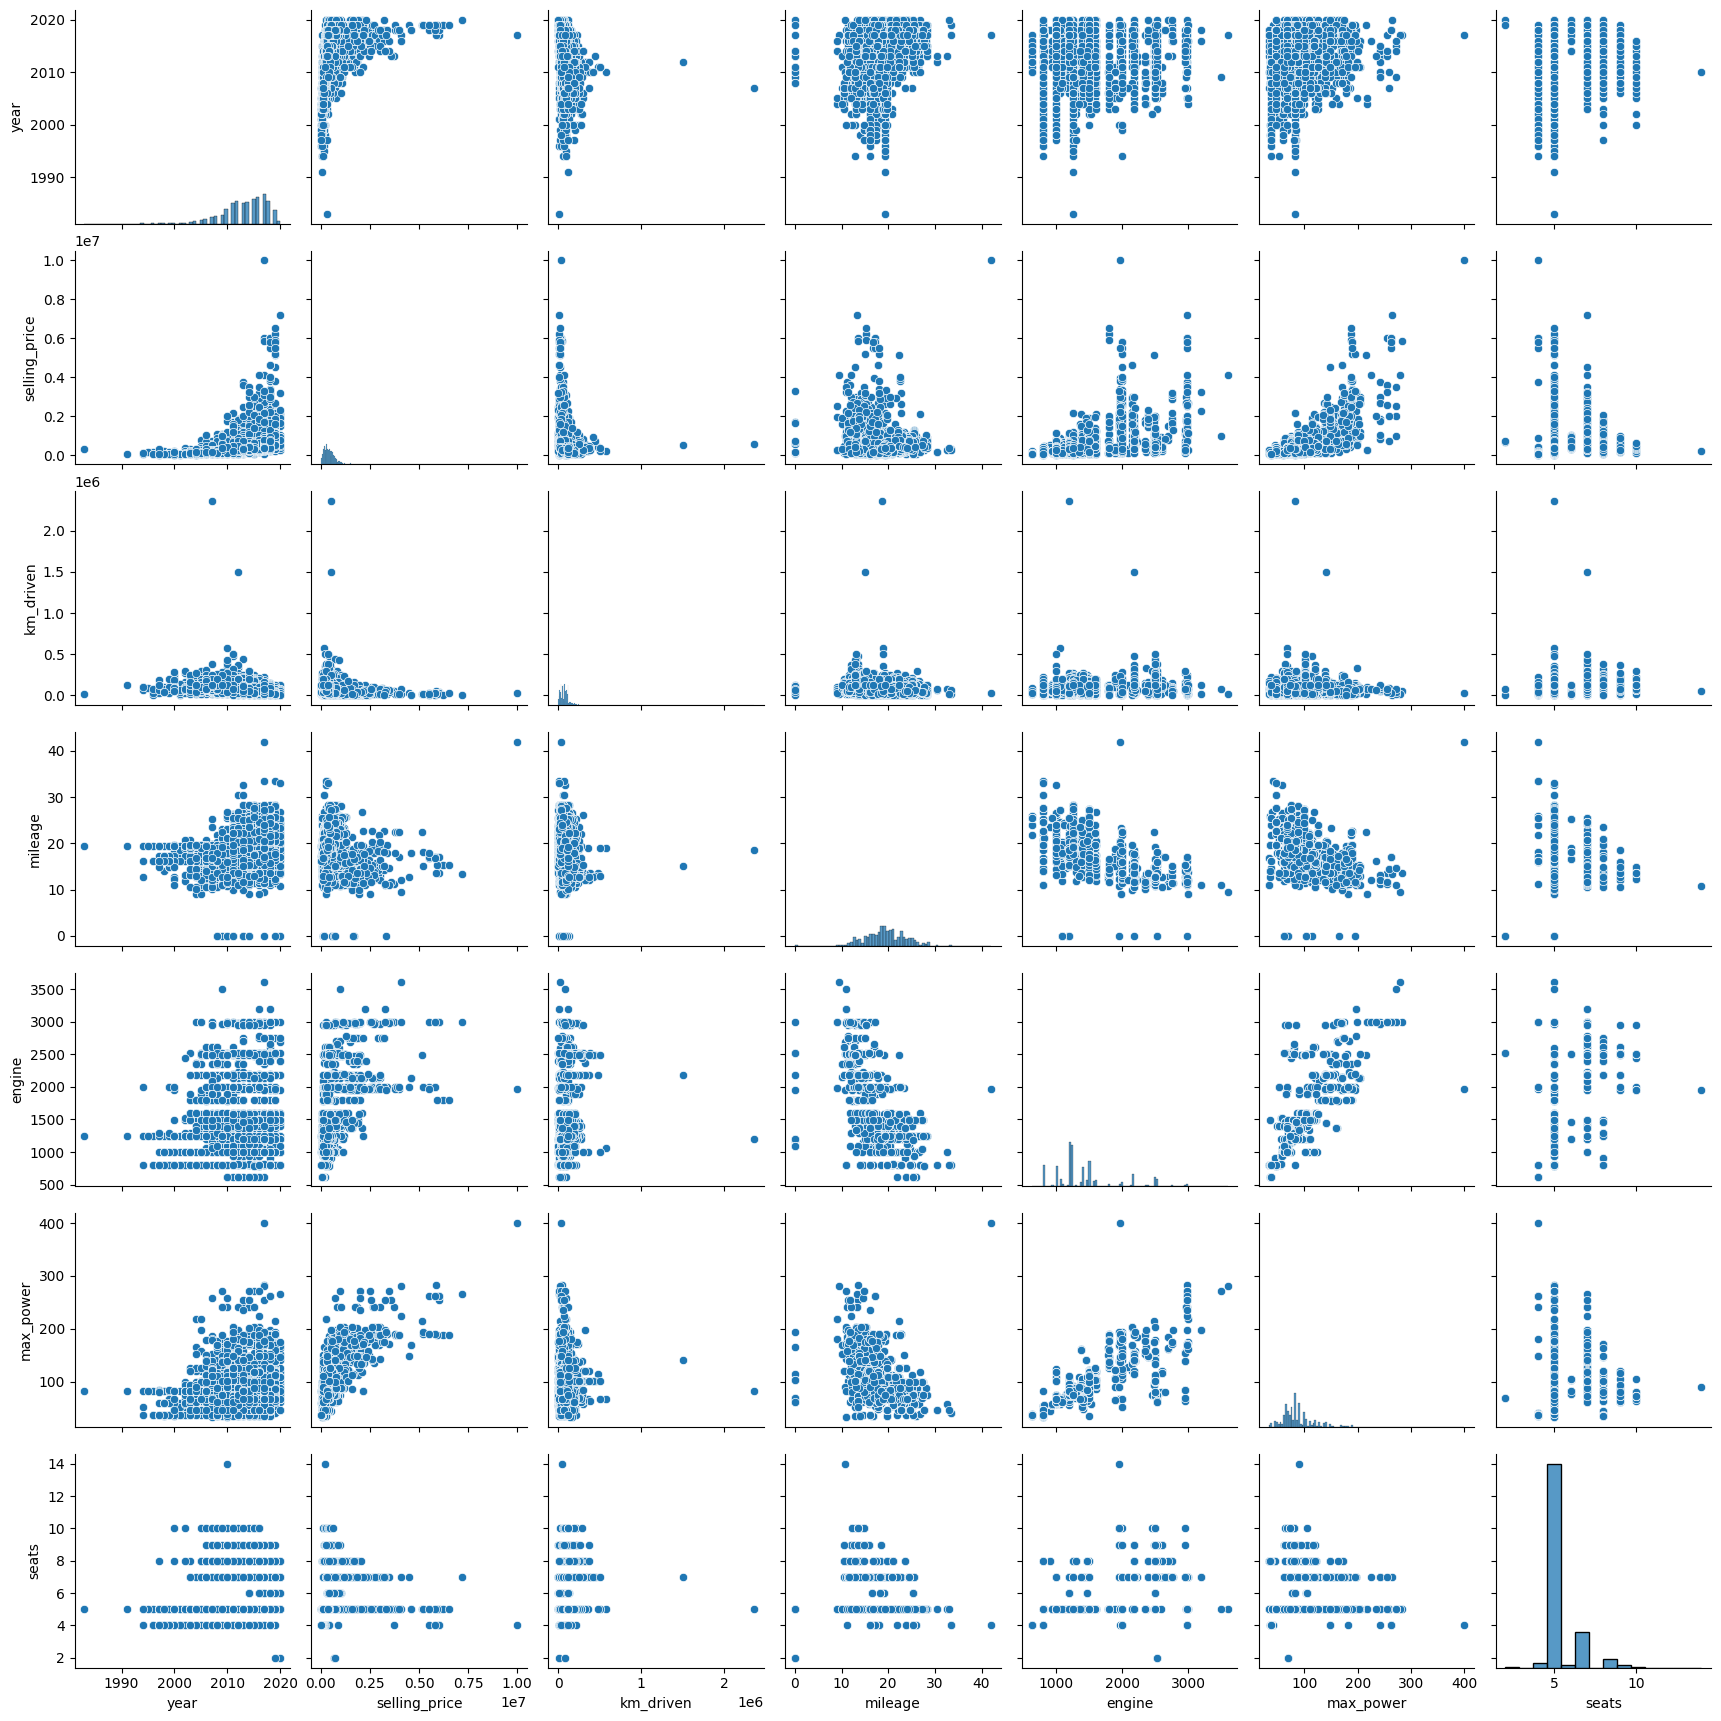

In [24]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Что можно сказать о связи предикторов с целевой переменной?**

- Стоимость машин в среднем выше у машин с 4 и 5 сидениями
- Чем больше максимальная мощность двигателя, тем больше стоимость машины
- Чем ниже пробег, тем выше стоимость
- Чем новее машина, тем она дороже

**А о корреляциях признаков?**

- Пробег несильно отрицательно коррелирует с максимальной мощностью и двигателем
- Двигатель сильно положительно скореллирован с максимальной мощностью

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

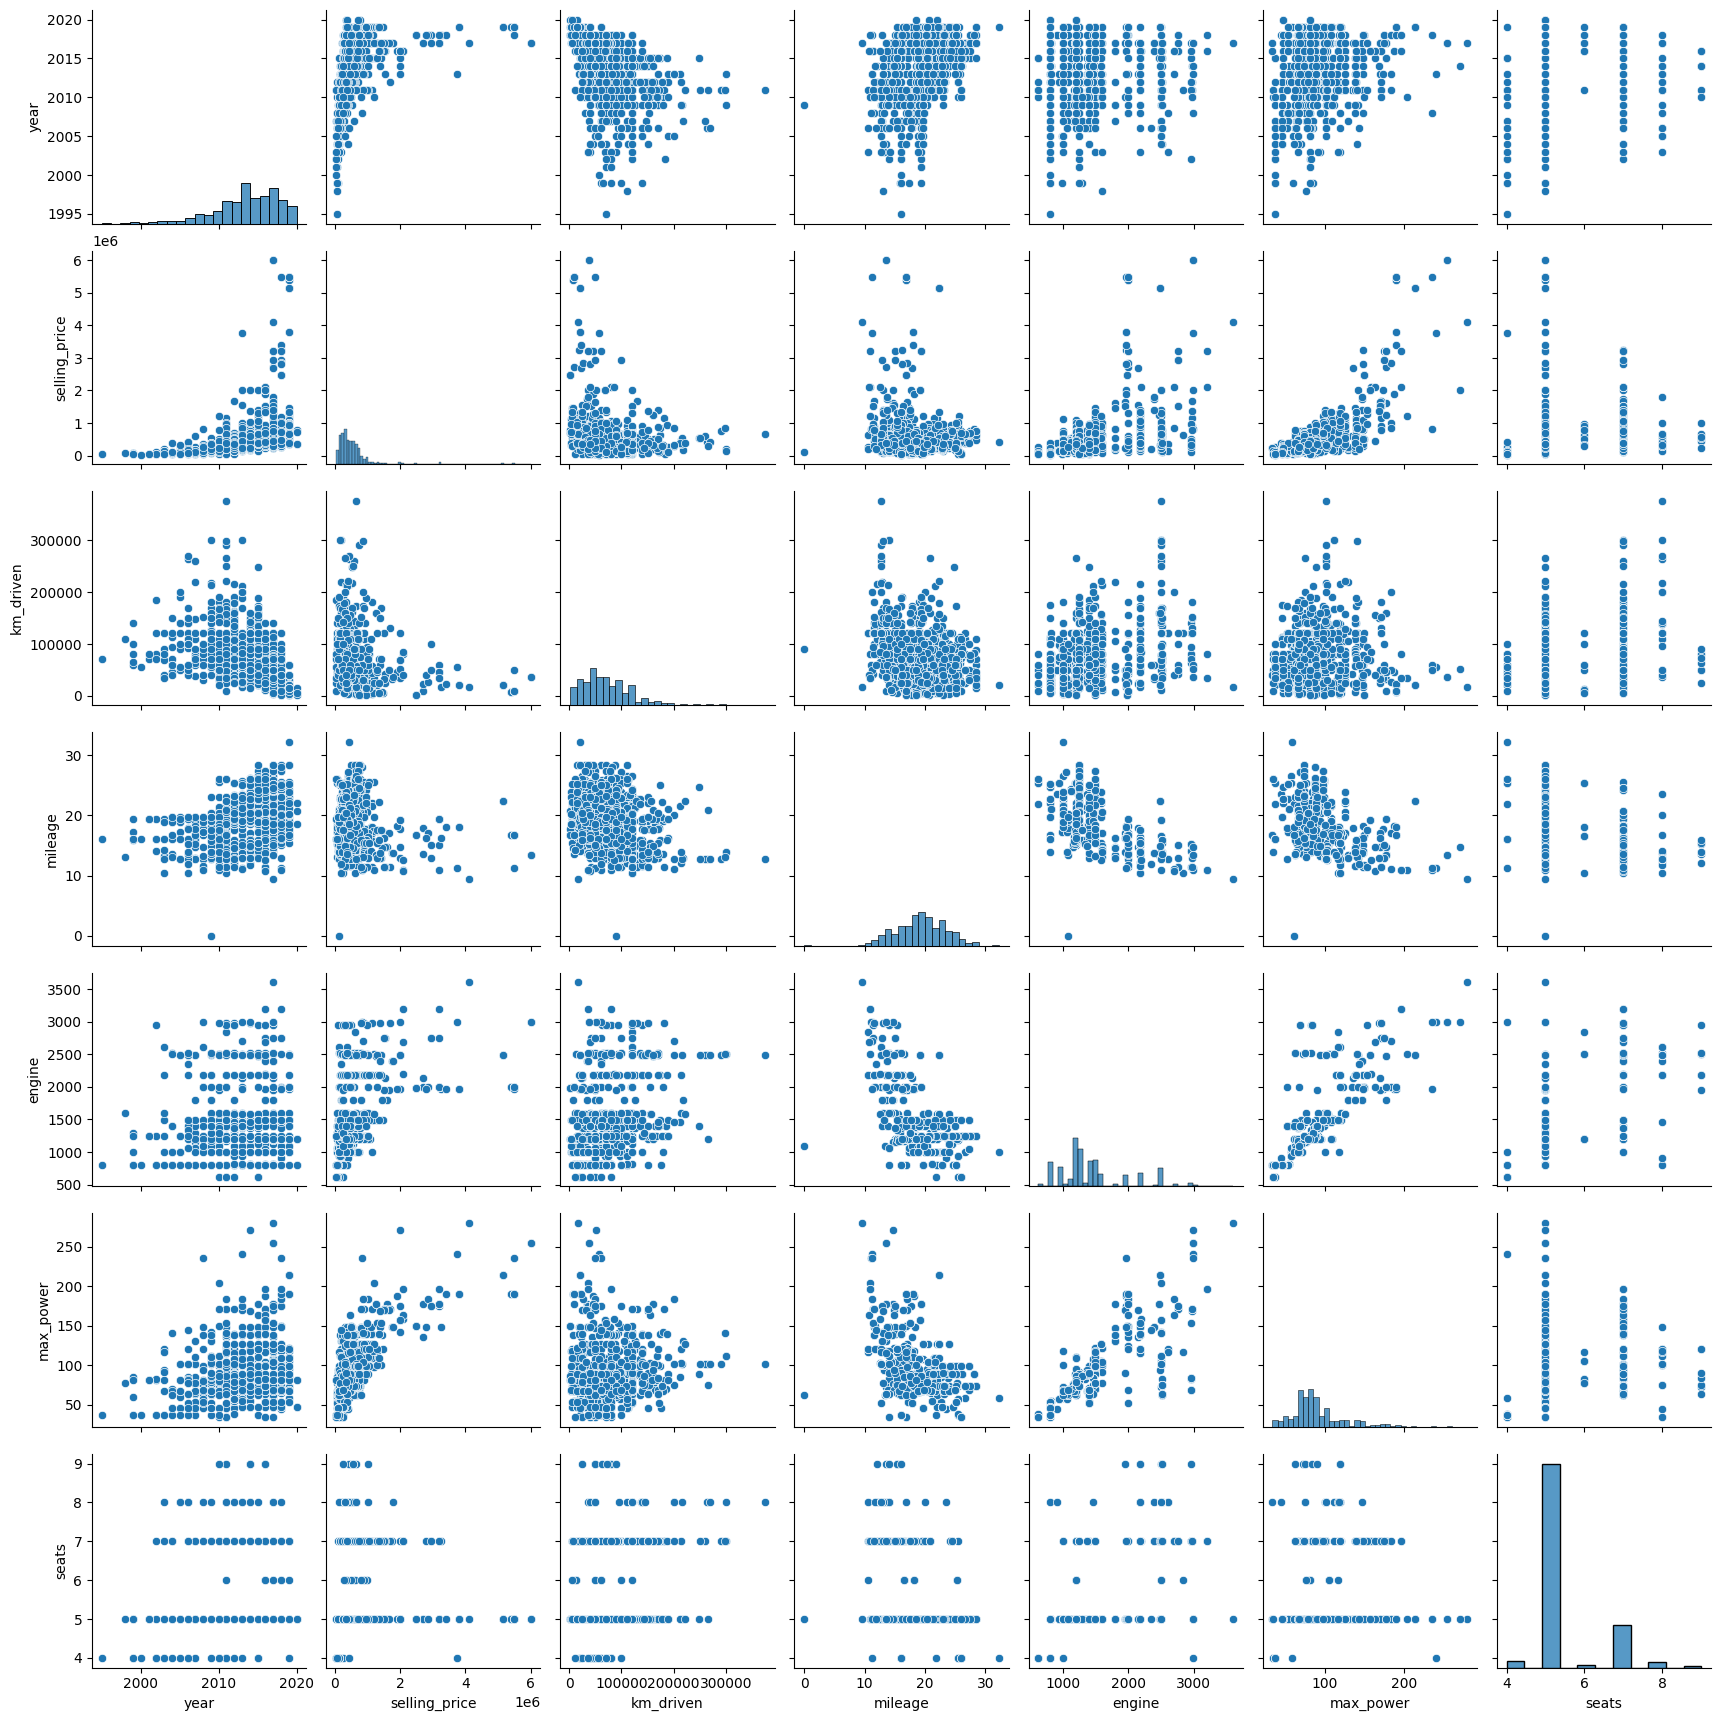

In [25]:
sns.pairplot(df_test)

**"Похожими ли оказались совокупности при разделении на трейн и тест?"**

Визуально сравнивать их очень неудобно, но кажется отношения между распределениями сохраняются

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

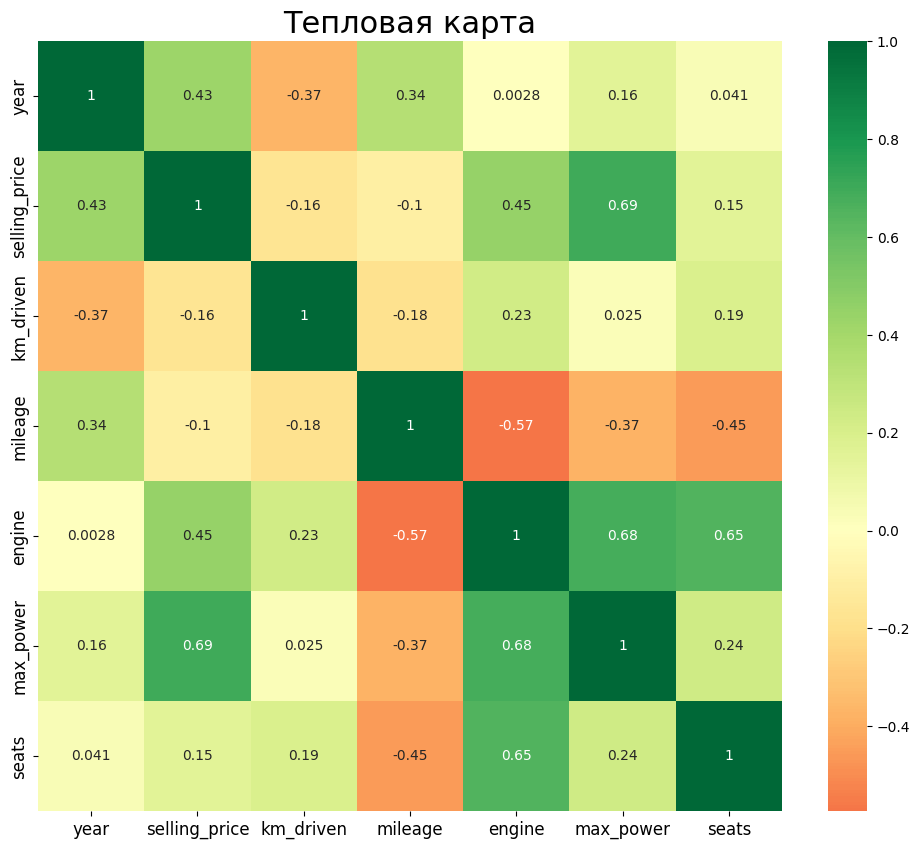

In [26]:
plt.figure(figsize=(12,10), dpi= 100)
sns.heatmap(df_train.corr(), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Тепловая карта', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Какие 2 признака наименее скоррелированы между собой?**
- engine и year

**Между какими наблюдается довольно сильная положительная линейная зависимость?**
- Между стоимостью продажи и максимальной мощностью автомобиля
- Между двигателем и максимальной мощностью
- Между двигателем и количеством сидений

**Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.**

Судя по матрице корреляций, между этими признаками отрицательная взаимосвязь, следовательно данный вывод корректен

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

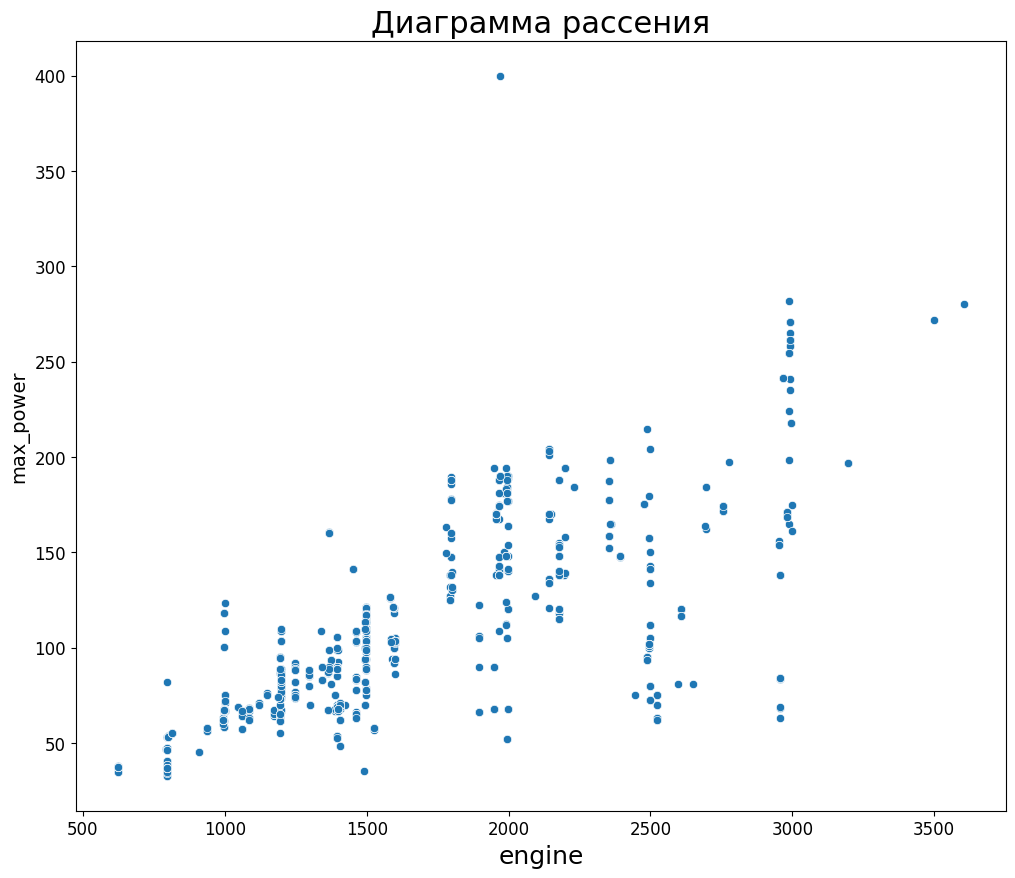

In [27]:
plt.figure(figsize=(12,10), dpi= 100)
sns.scatterplot(data=df_train, x='engine', y='max_power')
plt.title('Диаграмма рассения', fontsize=22)
plt.xticks(fontsize=12)
plt.xlabel('engine', fontsize=18)
plt.yticks(fontsize=12)
plt.ylabel('max_power', fontsize=14)
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Можно построить графики распределения плотности вероятностей по числовым признакам на треине и тесте

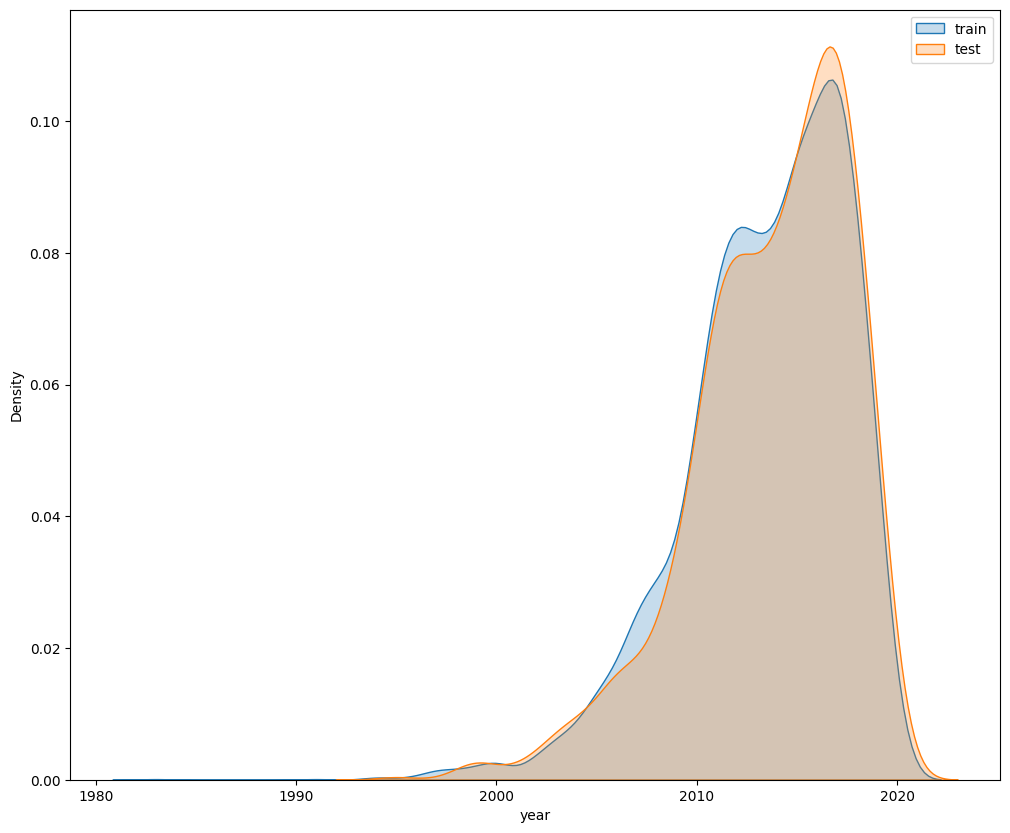

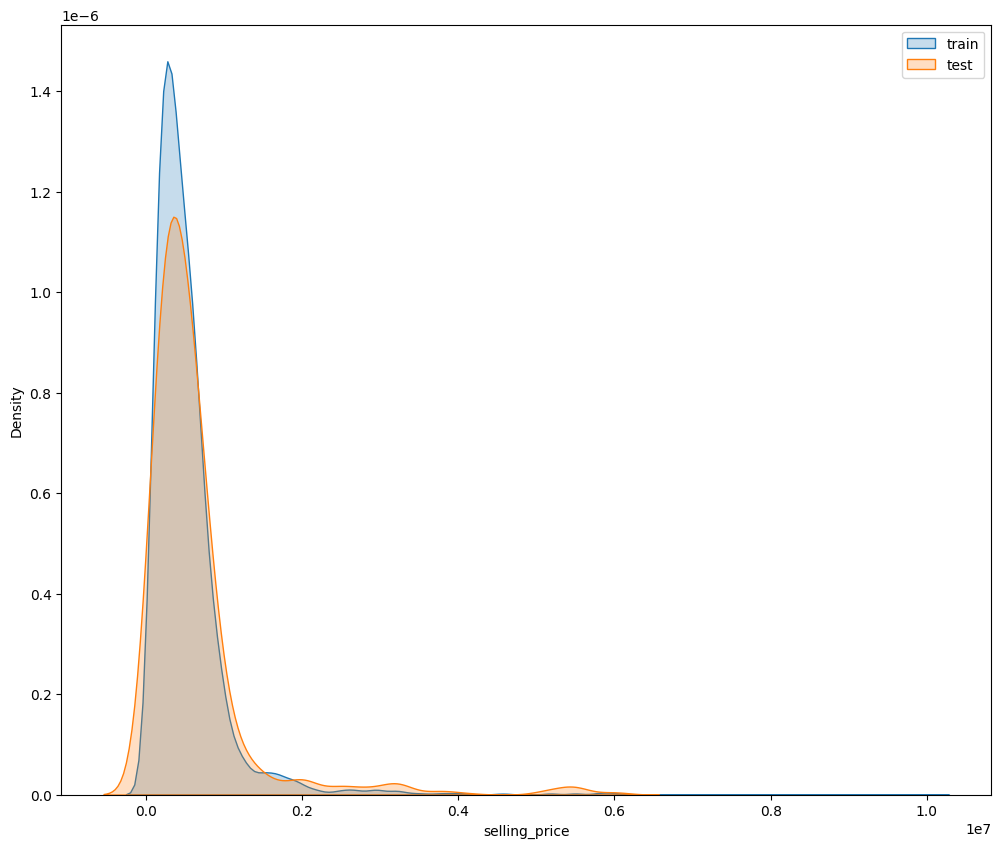

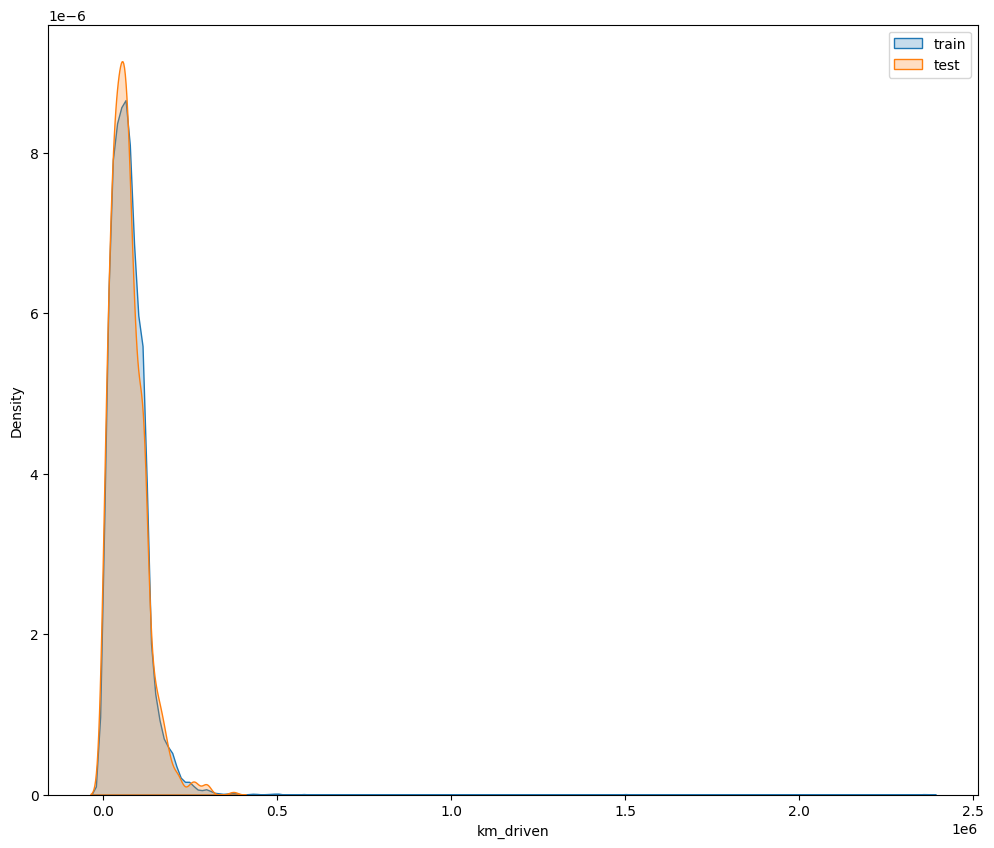

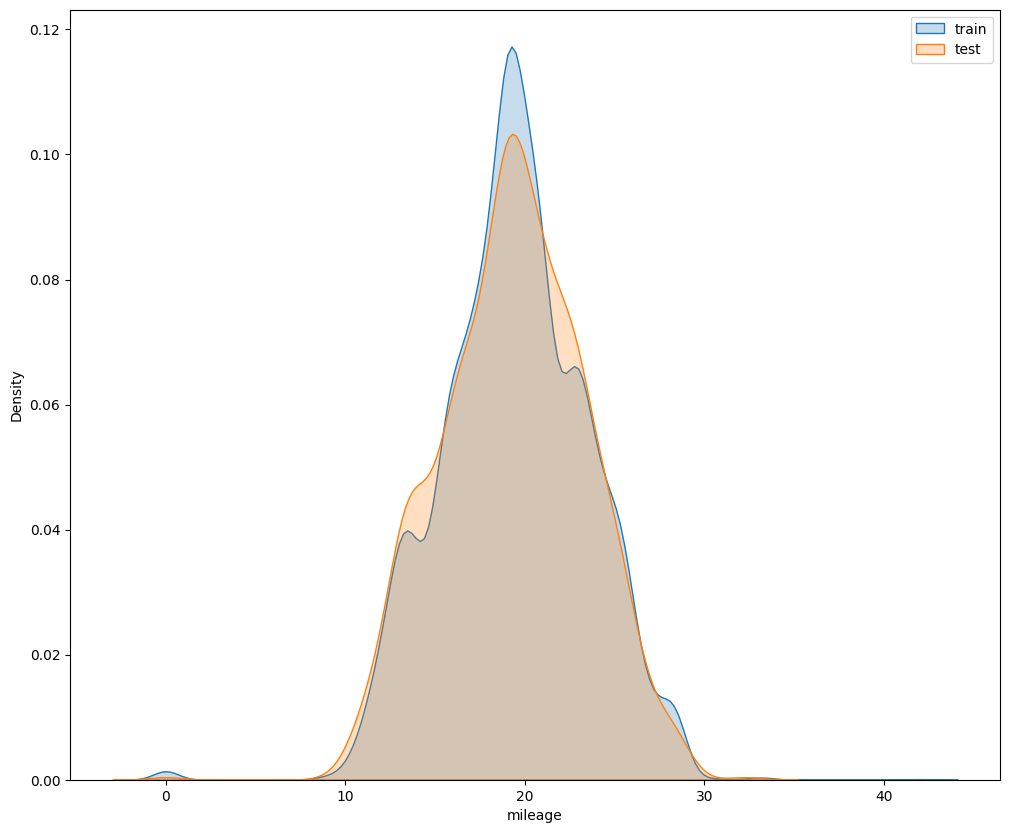

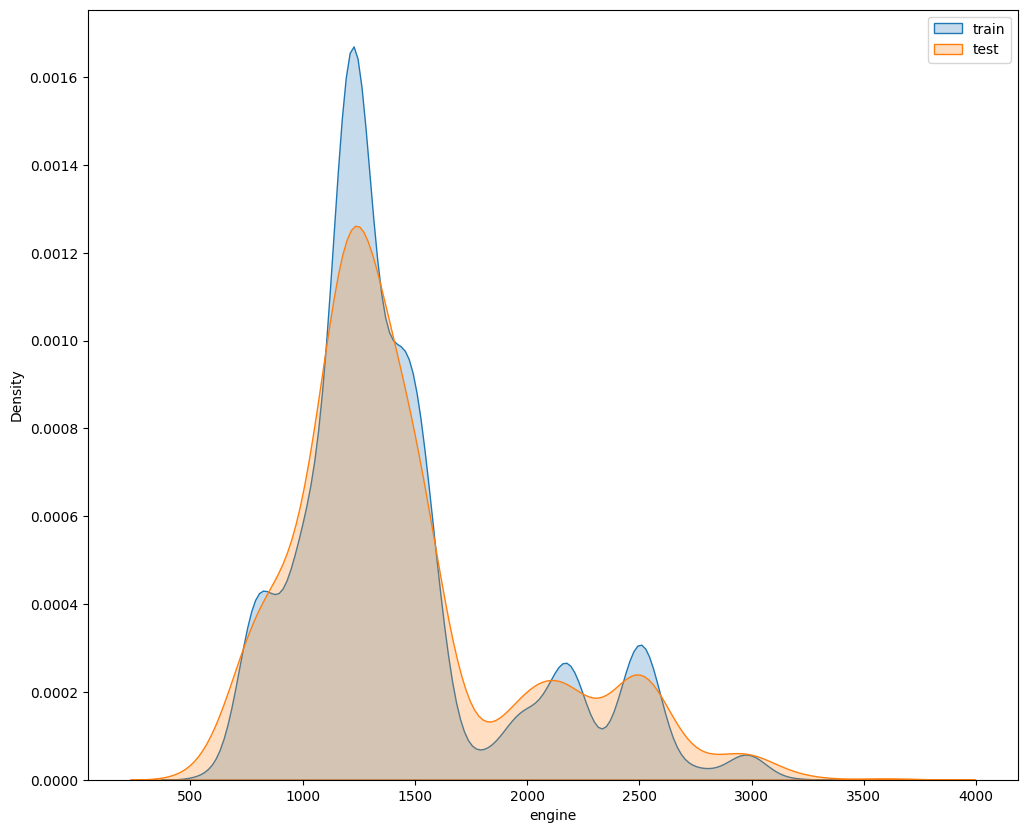

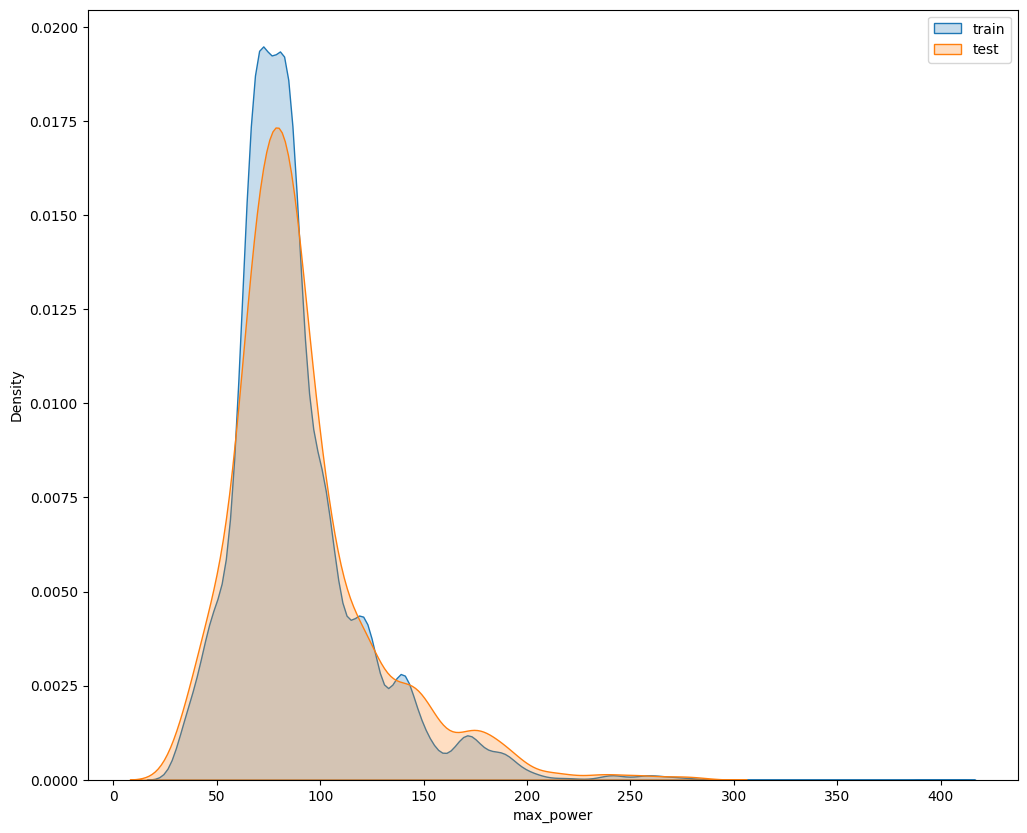

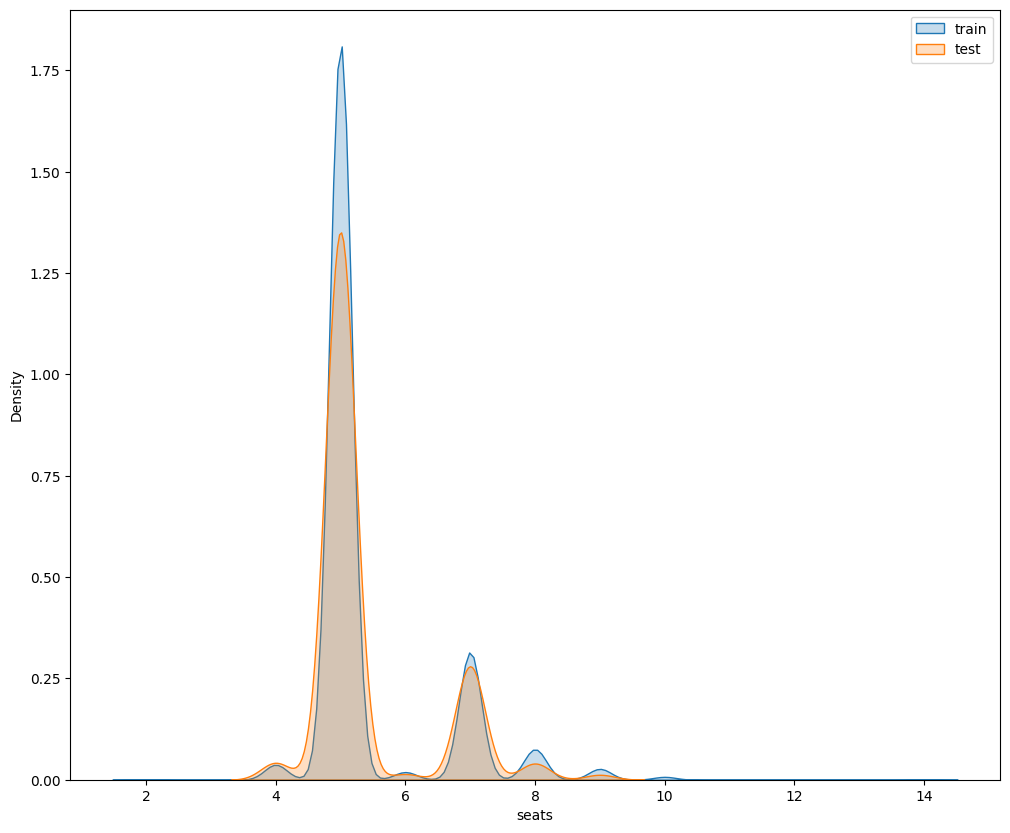

In [28]:
for features in df_train.select_dtypes(include='number').columns:
    fig, ax = plt.subplots(figsize=(12,10))
    sns.kdeplot(df_train[features], fill=True, ax=ax, label='train')
    sns.kdeplot(df_test[features],  fill=True, ax=ax, label='test')
    plt.legend()
    plt.show()

Судя по графикам, средние значения признаков на треин и тестовой выборках схожи.
При этом заметны более длинные хвосты на треине, что говорит о более высокой дисперсии чем на тесте

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [29]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [30]:
assert X_train.shape == (5840, 6)

In [31]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [32]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()

lr.fit(X_train, y_train)

print(f'r2_score train: {r2_score(y_train, lr.predict(X_train))}')
print(f'r2_score test: {r2_score(y_test, lr.predict(X_test))}')

print()
print(f'MSE train: {MSE(y_train, lr.predict(X_train))}')
print(f'MSE test: {MSE(y_test, lr.predict(X_test))}')

r2_score train: 0.5932097784368078
r2_score test: 0.5946576472666412

MSE train: 116601673169.10992
MSE test: 233002359160.80554


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [35]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

print(f'r2_score train: {r2_score(y_train, lr.predict(X_train_scaled))}')
print(f'r2_score test: {r2_score(y_test, lr.predict(X_test_scaled))}')

print()
print(f'MSE train: {MSE(y_train, lr.predict(X_train_scaled))}')
print(f'MSE test: {MSE(y_test, lr.predict(X_test_scaled))}')

r2_score train: 0.5932097784368073
r2_score test: 0.5946576472666552

MSE train: 116601673169.11008
MSE test: 233002359160.7975


In [36]:
X_train_scaled.describe()

,year,km_driven,mileage,engine,max_power,seats
count,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03
mean,2.328122e-14,-6.205082e-17,-9.283290e-16,-1.301851e-16,2.263030e-16,2.640202e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-7.430137e+00,-1.231167e+00,-4.875222e+00,-1.658595e+00,-1.746575e+00,-3.488601e+00
25%,-5.929826e-01,-5.818974e-01,-6.224460e-01,-4.786631e-01,-6.317754e-01,-4.344190e-01
50%,1.395696e-01,-6.579834e-02,-1.526502e-02,-3.736430e-01,-1.928230e-01,-4.344190e-01
75%,8.721218e-01,4.336523e-01,7.198756e-01,1.411615e-01,3.500084e-01,-4.344190e-01
max,1.604674e+00,3.806654e+01,5.662630e+00,4.477875e+00,9.882812e+00,8.728126e+00


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [37]:
pd.DataFrame(lr.coef_, index=X_train_scaled.columns, columns=['Weights']).sort_values(by='Weights', ascending=False)

,Weights
max_power,324496.857821
year,152247.330869
engine,59324.980365
mileage,29319.181026
seats,-22159.187867
km_driven,-44066.180213


**Какой признак оказался наиболее информативным в предсказании цены?**

Наиболее информативным признаком оказался max_power, что логично, тк он в наибольшей степени кореллирует с таргетом

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)

lasso.fit(X_train_scaled, y_train)

print(f'r2_score train: {r2_score(y_train, lasso.predict(X_train_scaled))}')
print(f'r2_score test: {r2_score(y_test, lasso.predict(X_test_scaled))}')

print()
print(f'MSE train: {MSE(y_train, lasso.predict(X_train_scaled))}')
print(f'MSE test: {MSE(y_test, lasso.predict(X_test_scaled))}')

r2_score train: 0.5932094347309672
r2_score test: 0.5945411036061286

MSE train: 116601771688.38095
MSE test: 233069351784.8468


In [39]:
lasso.coef_

array([152222.95252622, -43956.09557823,  29139.73125545,  58849.48038862,
       324584.95614774, -21871.68835872])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

L1 - регуляризация не занулила веса скорее всего из-за их большой величины, надо увеличить коэффициент регуляризации для большего штрафа больших весов

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [40]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
parametrs = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000]}

grid = GridSearchCV(lasso, parametrs, cv=10)
grid.fit(X_train_scaled, y_train)

print(f'r2_score train: {r2_score(y_train,  grid.best_estimator_.predict(X_train_scaled))}')
print(f'r2_score test: {r2_score(y_test,  grid.best_estimator_.predict(X_test_scaled))}')

print()
print(f'MSE train: {MSE(y_train,  grid.best_estimator_.predict(X_train_scaled))}')
print(f'MSE test: {MSE(y_test,  grid.best_estimator_.predict(X_test_scaled))}')

r2_score train: 0.5902799959165503
r2_score test: 0.5822900753681133

MSE train: 117441461162.46652
MSE test: 240111592651.9909


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

gridseachcv перебирает все наши параметры и с каждым выбранным параметром обучается на k - фолдах и усредняет результаты на них

В нашем случае 7 параметров коэф регуляризации и 10 фолдов, получается 70 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [41]:
grid.best_params_

{'alpha': 10000}

In [42]:
grid.best_estimator_.coef_

array([151476.09623234, -32582.58993931,   9568.21701743,  16792.19468864,
       330545.21365867,     -0.        ])

Лучший коэффициент регуляризации 10000. При нем произошло зануление веса у признака "seats"

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [43]:
from sklearn.linear_model import ElasticNet
np.random.seed(42)

el_net = ElasticNet()

parametrs = {'l1_ratio': np.arange(0.1, 1, 0.1),
             'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000]}

grid = GridSearchCV(el_net, parametrs, cv=10)
grid.fit(X_train_scaled, y_train)

print(f'r2_score train: {r2_score(y_train,  grid.best_estimator_.predict(X_train_scaled))}')
print(f'r2_score test: {r2_score(y_test,  grid.best_estimator_.predict(X_test_scaled))}')

print()
print(f'MSE train: {MSE(y_train,  grid.best_estimator_.predict(X_train_scaled))}')
print(f'MSE test: {MSE(y_test,  grid.best_estimator_.predict(X_test_scaled))}')

r2_score train: 0.5892558921546422
r2_score test: 0.572781468766195

MSE train: 117735008563.08592
MSE test: 245577411251.10574


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [44]:
grid.best_params_

{'alpha': 1, 'l1_ratio': 0.9}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [45]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat = df_test.drop(columns=['name', 'selling_price'])

In [46]:
assert X_train_cat.shape == (5840, 10)

In [47]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [48]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

cat_lst = ['fuel', 'seller_type', 'transmission', 'owner']
X_train_cat = X_train_cat[cat_lst]
X_test_cat = X_test_cat[cat_lst]

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat, y_train).toarray())
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat).toarray())

In [49]:
X_train_num_with_cat = pd.concat([X_train_scaled, X_train_cat_ohe], axis=1)
X_test_num_with_cat = pd.concat([X_test_scaled, X_test_cat_ohe], axis=1)

In [50]:
X_train_num_with_cat.columns = X_train_num_with_cat.columns.astype(str)
X_test_num_with_cat.columns = X_test_num_with_cat.columns.astype(str)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

ridge = Ridge()

parametrs = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000]}

grid = GridSearchCV(ridge, parametrs, cv=10, scoring='r2')
grid.fit(X_train_num_with_cat, y_train)

print(f'r2_score train: {r2_score(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'r2_score test: {r2_score(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

print()
print(f'MSE train: {MSE(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'MSE test: {MSE(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

r2_score train: 0.6246503418657265
r2_score test: 0.6335242514582882

MSE train: 107589602310.8089
MSE test: 210660725210.74997


**Удалось ли улучшить качество предсказаний?**

Качество немного улучшилось, но среднеквадратичная ошибка все равно очень большая

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## Генерация новых признаков

Попробуем добавить полиномы признаков 3 степени

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

In [53]:
X_train = df_train.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])
X_test = df_test.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [54]:
X_train = df_train.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])
X_test = df_test.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

X_train = pd.DataFrame(poly.fit_transform(X_train))
X_test = pd.DataFrame(poly.transform(X_test))

In [55]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [56]:
np.random.seed(42)

lasso = Lasso()


parametrs = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]}

grid = GridSearchCV(lasso, parametrs, cv=10, scoring='r2')
grid.fit(X_train_scaled, y_train)

print(f'r2_score train: {r2_score(y_train, grid.best_estimator_.predict(X_train_scaled))}')
print(f'r2_score test: {r2_score(y_test, grid.best_estimator_.predict(X_test_scaled))}')

print()
print(f'MSE train: {MSE(y_train, grid.best_estimator_.predict(X_train_scaled))}')
print(f'MSE test: {MSE(y_test, grid.best_estimator_.predict(X_test_scaled))}')

r2_score train: 0.7307059939133789
r2_score test: 0.7237456844999194

MSE train: 77189986434.40767
MSE test: 158798869167.79846


Теперь к этим признакам приджоиним категориальные

In [57]:
X_train_num_with_cat = pd.concat([X_train_scaled, X_train_cat_ohe], axis=1)
X_test_num_with_cat = pd.concat([X_test_scaled, X_test_cat_ohe], axis=1)

X_train_num_with_cat.columns = X_train_num_with_cat.columns.astype(str)
X_test_num_with_cat.columns = X_test_num_with_cat.columns.astype(str)

In [58]:
np.random.seed(42)

lasso = Lasso()

parametrs = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]}

grid = GridSearchCV(lasso, parametrs, cv=10, scoring='r2')
grid.fit(X_train_num_with_cat, y_train)

print(f'r2_score train: {r2_score(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'r2_score test: {r2_score(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

print()
print(f'MSE train: {MSE(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'MSE test: {MSE(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

r2_score train: 0.7374066435116178
r2_score test: 0.7309024670812023

MSE train: 75269323367.65004
MSE test: 154684946173.58118


## Обработка выбросов (удаляем самые выбивающиеся значения)

<Axes: >

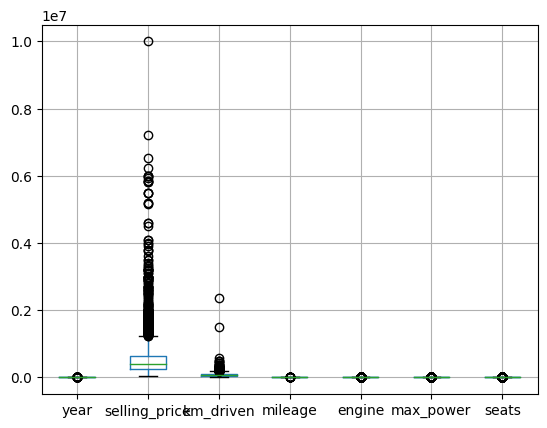

In [59]:
df_train.boxplot()

<Axes: >

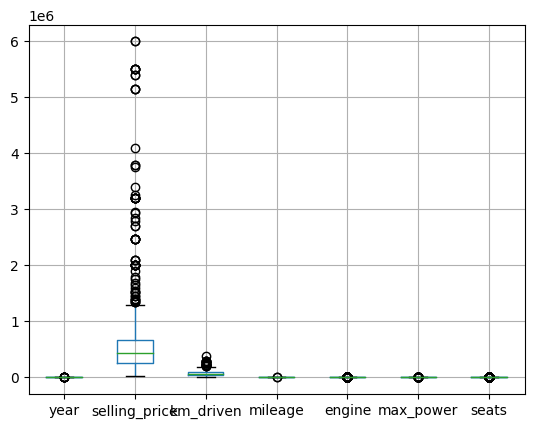

In [60]:
df_test.boxplot()

Выбросы видны как на тестовом датасете, так и на трейновом, но чистить тестовый мы не имеем права, поэтому будем выбрасывать наиболее экстремальные значения из трейна

<Axes: >

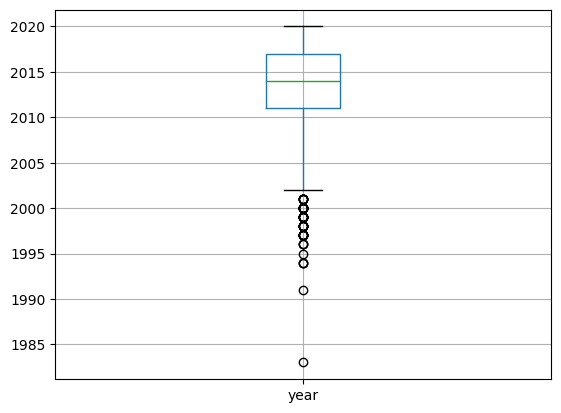

In [61]:
df_train.boxplot(column=['year'])

In [62]:
df_train = df_train[df_train['year'] > 1985]

In [63]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

<Axes: >

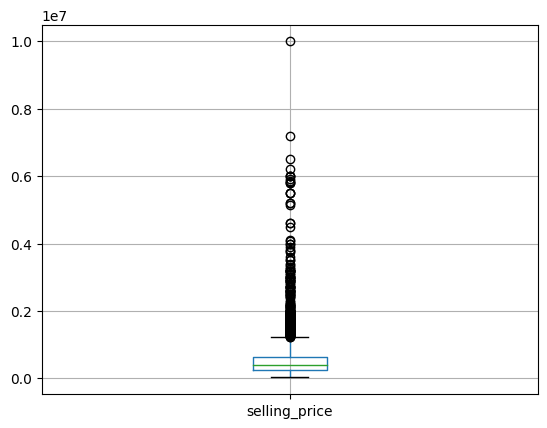

In [64]:
df_train.boxplot(column=['selling_price'])

In [65]:
df_train = df_train[df_train['selling_price'] < 1e07]

In [66]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

y_test = df_test['selling_price']
X_test = df_test.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

X_train = pd.DataFrame(poly.fit_transform(X_train))
X_test = pd.DataFrame(poly.transform(X_test))

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

cat_lst = ['fuel', 'seller_type', 'transmission', 'owner']

X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat = df_test.drop(columns=['name', 'selling_price'])

X_train_cat = X_train_cat[cat_lst]
X_test_cat = X_test_cat[cat_lst]

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat, y_train).toarray())
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat).toarray())

X_train_num_with_cat = pd.concat([X_train_scaled, X_train_cat_ohe], axis=1)
X_test_num_with_cat = pd.concat([X_test_scaled, X_test_cat_ohe], axis=1)

X_train_num_with_cat.columns = X_train_num_with_cat.columns.astype(str)
X_test_num_with_cat.columns = X_test_num_with_cat.columns.astype(str)

In [67]:
np.random.seed(42)

lasso = Lasso()

parametrs = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]}

grid = GridSearchCV(lasso, parametrs, cv=10, scoring='r2')
grid.fit(X_train_num_with_cat, y_train)

print(f'r2_score train: {r2_score(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'r2_score test: {r2_score(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

print()
print(f'MSE train: {MSE(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'MSE test: {MSE(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

r2_score train: 0.7295642229608823
r2_score test: 0.7464824264327015

MSE train: 73380336056.5241
MSE test: 145729140642.6533


In [68]:
np.random.seed(42)

ridge = Ridge()

parametrs = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000]}

grid = GridSearchCV(ridge, parametrs, cv=10, scoring='r2')
grid.fit(X_train_num_with_cat, y_train)

print(f'r2_score train: {r2_score(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'r2_score test: {r2_score(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

print()
print(f'MSE train: {MSE(y_train, grid.best_estimator_.predict(X_train_num_with_cat))}')
print(f'MSE test: {MSE(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

r2_score train: 0.7916213296063246
r2_score test: 0.8218569300355106

MSE train: 56541693661.66292
MSE test: 102401723604.68575


## Проверка таргета

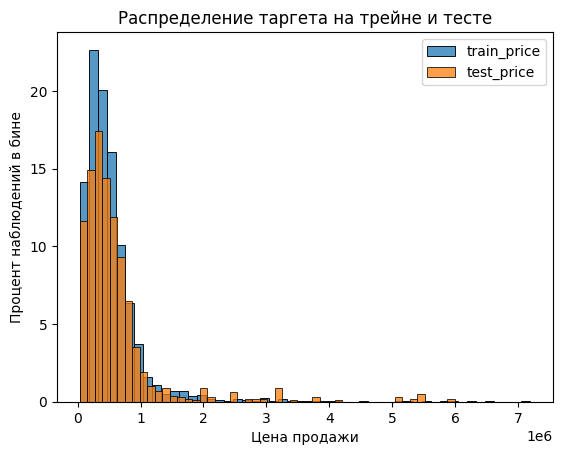

In [69]:
fig, ax = plt.subplots()
sns.histplot(df_train['selling_price'], bins=50, ax=ax, stat='percent', label='train_price')
sns.histplot(df_test['selling_price'], bins=50, ax=ax, stat='percent', label='test_price')
plt.title('Распределение таргета на трейне и тесте')
plt.xlabel('Цена продажи')
plt.ylabel('Процент наблюдений в бине')
plt.legend()
plt.show()

Заметно, что на тесте среднее по таргету смещено в большую сторону относительно трейна за счет большего числа выбросов. Эти выбросы могут объяснять высокую среднеквадратическую ошибку на тесте

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [70]:
def business_metrics(y_true, y_pred):
    preds_df = pd.DataFrame()
    preds_df['y_true'] = y_true
    preds_df['y_pred'] = y_pred

    preds_df['diff'] = np.abs(preds_df['y_true'] - preds_df['y_pred'])
    return preds_df[(preds_df['diff'] / preds_df['y_true']) <= 0.1].shape[0] / preds_df.shape[0]


print(f'Для теста бизнес метрика: {business_metrics(y_test, grid.best_estimator_.predict(X_test_num_with_cat))}')

Для теста бизнес метрика: 0.237


# Сохранение лучшей модели, весов, скейлера, объекта для создания полиномиальных фичей


In [71]:
import pickle

data = {
     'best_model': grid.best_estimator_,
     'coef_model': grid.best_estimator_.coef_,
     'scaler': scaler,
     'ohe': ohe,
     'poly': poly
 }

with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)



# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import pickle

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    """
    Функция принимает объект класса Item, преобразует его в соответствии с логикой построения модели
    и делает предсказание для 1 объекта
    """

    test_item = dict(item)

    df = pd.DataFrame.from_dict([test_item])
    df = df.drop(columns=['name', 'torque'])

    df['mileage'] = df['mileage'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
    df['engine'] = df['engine'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
    df['max_power'] = df['max_power'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

    df[['seats', 'engine']] = df[['seats', 'engine']].astype(int)

    with open('data.pickle', 'rb') as f:
        data = pickle.load(f)

    #y_test = df['selling_price']
    X_test = df.drop(columns=['selling_price', 'fuel', 'seller_type', 'transmission', 'owner'])

    X_test = pd.DataFrame(data['poly'].transform(X_test))
    X_test_scaled = pd.DataFrame(data['scaler'].transform(X_test), columns=X_test.columns)

    cat_lst = ['fuel', 'seller_type', 'transmission', 'owner']
    X_test_cat = df.drop(columns=['selling_price'])
    X_test_cat = X_test_cat[cat_lst]
    X_test_cat_ohe = pd.DataFrame(data['ohe'].transform(X_test_cat).toarray())

    X_test_num_with_cat = pd.concat([X_test_scaled, X_test_cat_ohe], axis=1)

    X_test_num_with_cat.columns = X_test_num_with_cat.columns.astype(str)

    return data['best_model'].predict(X_test_num_with_cat)


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    """
        Функция принимает список объектов класса Item, преобразует их в соответствии с логикой построения модели
        и делает список предсказаний цены для признакового описания каждого объекта
    """

    preds = []
    for obj in items:
        test_item = dict(obj)

        df = pd.DataFrame.from_dict([test_item])
        df = df.drop(columns=['name', 'torque'])

        df['mileage'] = df['mileage'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
        df['engine'] = df['engine'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
        df['max_power'] = df['max_power'].apply(
            lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

        df[['seats', 'engine']] = df[['seats', 'engine']].astype(int)

        with open('data.pickle', 'rb') as f:
            data = pickle.load(f)

        #y_test = df['selling_price']
        X_test = df.drop(columns=['selling_price', 'fuel', 'seller_type', 'transmission', 'owner'])

        X_test = pd.DataFrame(data['poly'].transform(X_test))
        X_test_scaled = pd.DataFrame(data['scaler'].transform(X_test), columns=X_test.columns)

        cat_lst = ['fuel', 'seller_type', 'transmission', 'owner']
        X_test_cat = df.drop(columns=['selling_price'])
        X_test_cat = X_test_cat[cat_lst]
        X_test_cat_ohe = pd.DataFrame(data['ohe'].transform(X_test_cat).toarray())

        X_test_num_with_cat = pd.concat([X_test_scaled, X_test_cat_ohe], axis=1)

        X_test_num_with_cat.columns = X_test_num_with_cat.columns.astype(str)
        preds.append(data['best_model'].predict(X_test_num_with_cat))
    return preds

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

# Новый раздел

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link